In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [1]:
import pandas as pd
import numpy as np

## Load the dataset

In [4]:
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [12]:
train[:10]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [14]:
train.shape

(54808, 14)

In [16]:
train.select_dtypes(exclude='object')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0
54804,74592,1,37,2.0,6,0,0,56,0
54805,13918,1,27,5.0,3,1,0,79,0
54806,13614,1,29,1.0,2,0,0,45,0


In [18]:
train['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [20]:
train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [22]:
train['department'].nunique()

9

In [26]:
train.shape

(54808, 14)

In [24]:
test.shape

(23490, 13)

In [28]:
54808 + 23490

78298

In [30]:
54808/78298 , 23490/78298

(0.6999923369690159, 0.3000076630309842)

In [32]:
test[:5]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [34]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [38]:
train.duplicated().sum()

0

In [40]:
train['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [42]:
36669 + 14925 + 805

52399

In [44]:
54808 - 52399

2409

In [46]:
train['education'].value_counts(dropna=False)

education
Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: count, dtype: int64

In [50]:
train['education'].value_counts(dropna=False, normalize = True) * 100

education
Bachelor's          66.904467
Master's & above    27.231426
NaN                  4.395344
Below Secondary      1.468764
Name: proportion, dtype: float64

In [52]:
train['previous_year_rating'].value_counts(dropna=False, normalize = True) * 100

previous_year_rating
3.0    33.969494
5.0    21.422055
4.0    18.021092
1.0    11.354182
2.0     7.708729
NaN     7.524449
Name: proportion, dtype: float64

In [54]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [56]:
test[test['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
49,3720,Sales & Marketing,region_2,NaN,m,sourcing,1,36,5.0,4,1,0,49
67,26977,Operations,region_2,NaN,m,sourcing,1,28,3.0,3,0,0,59
89,2347,Analytics,region_15,NaN,m,other,2,37,5.0,8,1,0,82
127,42719,Analytics,region_21,NaN,m,sourcing,1,27,NaN,1,0,0,80
138,2721,Analytics,region_22,NaN,f,sourcing,2,26,5.0,3,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,14036,Sales & Marketing,region_7,NaN,m,other,6,26,3.0,3,0,0,48
23424,5890,Analytics,region_15,NaN,m,sourcing,1,34,3.0,5,0,0,87
23452,65429,Analytics,region_15,NaN,m,sourcing,1,30,2.0,7,0,0,83
23459,30477,Sales & Marketing,region_22,NaN,m,other,1,31,2.0,7,0,0,52


In [64]:
test['education'].isna().sum()

1034

In [66]:
test.shape

(23490, 13)

In [68]:
23490 - 1034

22456

In [70]:
test[test['education'].isna() == False]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [72]:
test[test['education'].notna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [77]:
test['education'].notna().sum()

22456

## Combining the train and test

In [117]:
data = pd.concat([train, test])

In [119]:
pd.concat([train, test])

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [121]:
train.shape

(54808, 14)

In [123]:
test.shape

(23490, 13)

In [125]:
train.shape[0] + test.shape[0]

78298

In [127]:
data[:3]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0


In [129]:
data.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0


In [131]:
data.tail(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [135]:
# data.reset_index()

In [137]:
data.reset_index(inplace=True, drop=True)

In [173]:
data.shape

(78298, 14)

In [139]:
data.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0


In [141]:
data.tail(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78297,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [143]:
data['is_promoted'].value_counts(dropna=False)

is_promoted
0.0    50140
NaN    23490
1.0     4668
Name: count, dtype: int64

In [145]:
50140 + 4668

54808

In [147]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [149]:
train['education'].value_counts(dropna=False, normalize = True) * 100

education
Bachelor's          66.904467
Master's & above    27.231426
NaN                  4.395344
Below Secondary      1.468764
Name: proportion, dtype: float64

In [ ]:
4 -> 2:1.2:0.8

In [151]:
data['education'].fillna('unknown', inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_2452\3083229416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education'].fillna('unknown', inplace=True)


In [153]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# df.fillna({education: 'unknown'}, inplace=True)

In [157]:
data['education'].value_counts(dropna=False, normalize = True) * 100

education
Bachelor's          66.728397
Master's & above    27.368515
unknown              4.397303
Below Secondary      1.505786
Name: proportion, dtype: float64

In [163]:
data[data['previous_year_rating'].isna()]['length_of_service'].unique()

array([1], dtype=int64)

In [165]:
data['previous_year_rating'].fillna(0, inplace=True)

In [167]:
data['previous_year_rating'].value_counts()

previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
0.0     5936
Name: count, dtype: int64

In [169]:
data[:4]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0


In [171]:
train['recruitment_channel'].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

In [175]:
data['gender'] = data['gender'].replace({'f': 0, 'm': 1})

In [177]:
data[:2]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0


In [181]:
data.select_dtypes(include='object').columns


Index(['department', 'region', 'education', 'recruitment_channel'], dtype='object')

In [183]:
encoded_data = pd.get_dummies(data, columns=['department', 'region', 'education', 'recruitment_channel'])
encoded_data[:5]

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0.0,...,True,False,False,False,False,True,False,False,False,True
1,65141,1,1,30,5.0,4,0,0,60,0.0,...,False,False,False,True,False,False,False,True,False,False
2,7513,1,1,34,3.0,7,0,0,50,0.0,...,False,False,False,True,False,False,False,False,False,True
3,2542,1,2,39,1.0,10,0,0,50,0.0,...,False,False,False,True,False,False,False,True,False,False
4,48945,1,1,45,3.0,2,0,0,73,0.0,...,False,False,False,True,False,False,False,True,False,False


<Axes: xlabel='department'>

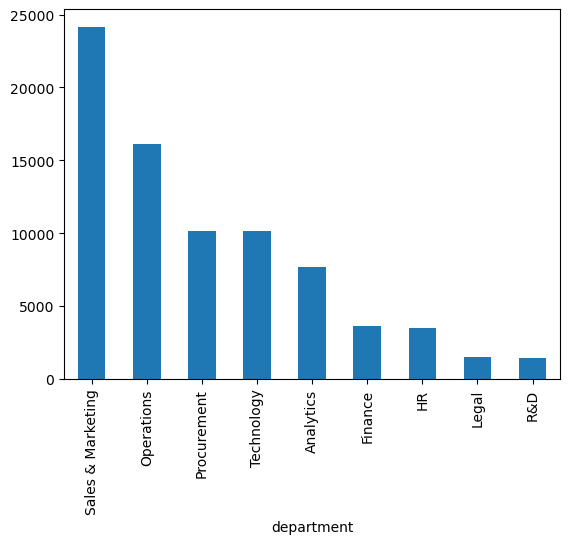

In [185]:
data['department'].value_counts().plot(kind = 'bar')

<Axes: ylabel='Frequency'>

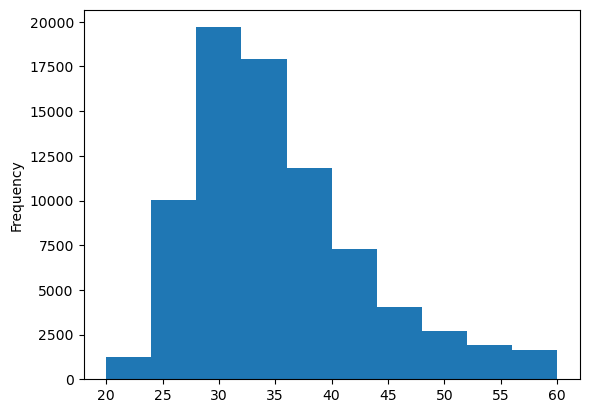

In [187]:
data['age'].plot(kind = 'hist')

In [189]:
data['age'].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

<Axes: xlabel='is_promoted'>

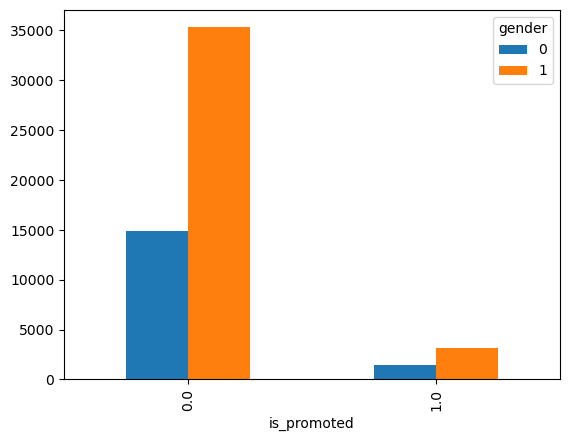

In [191]:
pd.crosstab(data['is_promoted'], data['gender']).plot(kind='bar')

In [193]:

from sklearn.preprocessing import MinMaxScaler

In [199]:
encoded_data[:3]

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0.0,...,True,False,False,False,False,True,False,False,False,True
1,65141,1,1,30,5.0,4,0,0,60,0.0,...,False,False,False,True,False,False,False,True,False,False
2,7513,1,1,34,3.0,7,0,0,50,0.0,...,False,False,False,True,False,False,False,False,False,True


In [203]:
# data[:3]

In [207]:
train['no_of_trainings'].value_counts()

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64

In [195]:
mms = MinMaxScaler()


In [209]:
encoded_data.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
    

In [217]:
encoded_data['avg_training_score'].value_counts()

avg_training_score
50    3943
49    3825
48    3521
51    3370
60    3044
      ... 
98      51
99      48
41      37
40       8
39       3
Name: count, Length: 61, dtype: int64

In [219]:
scaled_data = mms.fit_transform(encoded_data[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']])

In [221]:
scaled_data = pd.DataFrame(scaled_data, columns=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score'])

In [223]:
scaled_data[:4]

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,0.000000,0.375,1.0,0.194444,0.166667
1,0.000000,0.250,1.0,0.083333,0.350000
2,0.000000,0.350,0.6,0.166667,0.183333
3,0.111111,0.475,0.2,0.250000,0.183333


In [227]:
preprocessed_data = pd.concat([scaled_data, encoded_data.drop(columns=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score'])], axis = 1)

In [231]:
preprocessed_data.head(3)

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,employee_id,gender,KPIs_met >80%,awards_won?,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.375,1.0,0.194444,0.166667,65438,0,1,0,0.0,...,True,False,False,False,False,True,False,False,False,True
1,0.0,0.250,1.0,0.083333,0.350000,65141,1,0,0,0.0,...,False,False,False,True,False,False,False,True,False,False
2,0.0,0.350,0.6,0.166667,0.183333,7513,1,0,0,0.0,...,False,False,False,True,False,False,False,False,False,True


In [233]:
preprocessed_data.tail(3)

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,employee_id,gender,KPIs_met >80%,awards_won?,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
78295,0.000000,0.150,0.8,0.083333,0.183333,45409,0,0,0,NaN,...,False,False,False,True,False,False,False,False,False,True
78296,0.222222,0.175,0.0,0.000000,0.516667,1186,1,0,0,NaN,...,False,False,False,True,False,False,False,False,False,True
78297,0.222222,0.500,1.0,0.111111,0.833333,5973,1,1,0,NaN,...,False,False,False,False,False,True,False,True,False,False


In [237]:
True == 1

True

In [239]:
False == 0

True

In [241]:
False == 1

False

In [247]:
# True is 1

In [249]:
# preprocessed_data.dtype

In [251]:
preprocessed_data.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'employee_id', 'gender', 'KPIs_met >80%',
       'awards_won?', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'reg

In [253]:
preprocessed_data.drop(['employee_id'], axis=1, inplace=True)

In [255]:
prepr_train = preprocessed_data[preprocessed_data['is_promoted'].notna()]

In [257]:
prepr_test = preprocessed_data[preprocessed_data['is_promoted'].isna()]

In [259]:
prepr_train.shape, prepr_test.shape

((54808, 59), (23490, 59))

In [261]:
54808 + 23490

78298

In [263]:
54808/ 78298

0.6999923369690159